# GHCN_CAMS Gridded 2m Temperature (Land)

GHCN CAMS is a high resolution (0.5x0.5) analyzed global land surface temperatures from 1948 to near present.

Source: https://psl.noaa.gov/data/gridded/data.ghcncams.html

In [24]:
# Download the data
!wget https://downloads.psl.noaa.gov/Datasets/ghcncams/air.mon.mean.nc

--2023-04-05 09:10:42--  https://downloads.psl.noaa.gov/Datasets/ghcncams/air.mon.mean.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182036711 (174M) [application/x-netcdf]
Saving to: ‘air.mon.mean.nc’

air.mon.mean.nc     100%[===================>] 173.60M  7.72MB/s    in 18s     

2023-04-05 09:11:00 (9.71 MB/s) - ‘air.mon.mean.nc’ saved [182036711/182036711]



In [164]:
import xarray as xr

In [165]:
# Read in the netCDF file
filename = "air.mon.mean.nc"
ds = xr.open_dataset(filename, decode_coords="all")

In [166]:
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 902)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-02-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

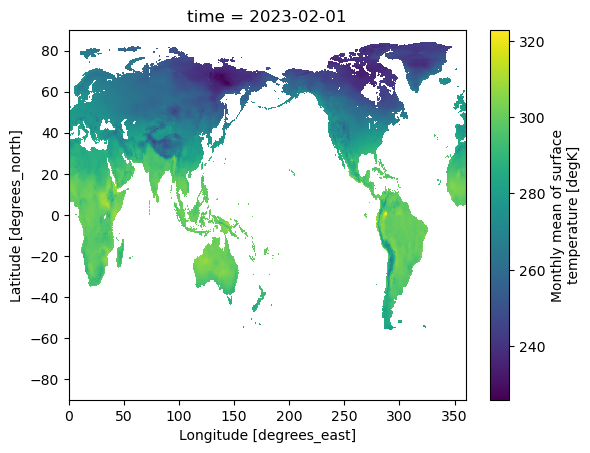

In [167]:
# Plot monthly average surface temperature in February 2023
ds.sel(time='2023-02-01').air.plot();

In [168]:
ds.rio.bounds()

(0.0, -90.0, 360.0, 90.0)

This data comes with longitudes in 0–360 degrees, but -180 to 180 is more convenient. Convert it to -180 to 180.

In [169]:
def convert360_180(_ds):
    """
    Source: https://nordicesmhub.github.io/forces-2021/learning/example-notebooks/some-xarray-pandas-presentation_Sara.html
    convert longitude from 0-360 to -180 -- 180 deg
    """
    # check if already 
    attrs = _ds['lon'].attrs
    if _ds['lon'].min() >= 0:
        with xr.set_options(keep_attrs=True): 
            _ds.coords['lon'] = (_ds['lon'] + 180) % 360 - 180
        _ds = _ds.sortby('lon')
    return _ds

In [170]:
ds = convert360_180(ds)

In [171]:
ds.rio.bounds()

(-180.0, -90.0, 180.0, 90.0)

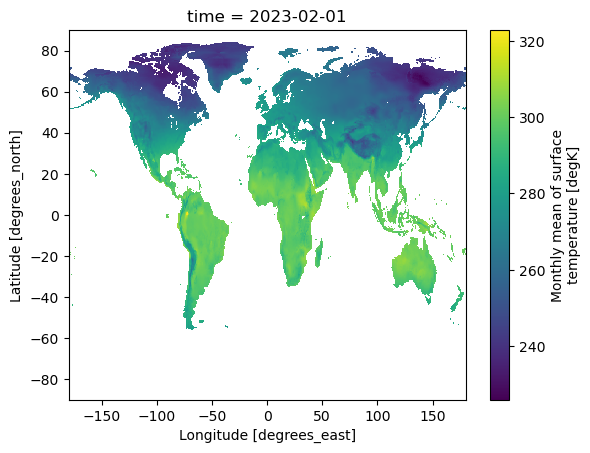

In [172]:
# Plot monthly average surface temperature in February 2023
ds.sel(time='2023-02-01').air.plot();

In [173]:
# Save February 2023 temperature to raster
month = '2023-02-01'
ds.sel(time=month).rio.write_crs("EPSG:4326").rio.to_raster(f"{month}.tif")